In [1]:
import astropy.units as u
import numpy as np
import popsims
import matplotlib.pyplot as plt
import astropy.coordinates as astro_coord
import glob
import pandas as pd

import itertools
from scipy import stats

from popsims.plot_style import  plot_style
plot_style()

#from shapey import Box
#paths
path_plot ='../figures/'
path_data = '../data/stream/'
path_images = '../data/images/'
isochrone_path='../data/isochrones/'


In [68]:
def read_orbit_file(filename):
    return np.load(path_data+'/{}'.format(filename), allow_pickle=True)

def plot_density(r, grid, ax, label):
    vals=[]
    dx= grid[1]-grid[0]
    for g in grid:
        n= len(r[np.logical_and(r>=g,r<=g+dx)])
        vals.append(n/dx)
        
    ax.plot(grid, vals, linewidth=3, label=label)
    return 

def rotate(x, y, ang, c=(0,0)):
    """
    Angle must be in radians
    """
    
    #rotation matrix
    r=[[np.cos(ang), -np.sin(ang)],
       [np.sin(ang), np.cos(ang)]]
    
    i=np.identity(2)
    
    mat=np.matrix([[r[0][0], r[0][1], np.dot(i-r, c)[0]],
                   [r[1][0], r[1][1], np.dot(i-r, c)[1]],
                   [0., 0., 1.]])

    z=np.ones_like(x)
    
    rotated=np.array(np.dot(mat, np.array([x, y, z])))
    
    return rotated[0], rotated[1] 

def visualize_stream(rgc, xlim, ylim, xgrid, vhalo, ax, ax1, offset=1):
    
    #unperturbed


    #filename='orgininalpal5_rgc{}'.format(rgc)
    filename='orgininalno_self_grav_pal5_rgc{}'.format(rgc)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    center=np.nanmedian(np.array(rgc.split('_')).astype(float))
    
    x0, y0=st0.y.value, st0.x.value
    #mask= ((x0-np.nanmedian(x0))**2+(y0-np.nanmedian(y0))**2)**0.5<5
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.05, c='k')
    plot_density(x0, xgrid, ax1, 'Unperturbed')
    
    
    mhalo=2e6
    #filename='pal5_rgc{}_no_selfgrav_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    filename='no_self_grav_pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    print (filename)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    
    #deptermine optimal rotation angle by fitting a line to the stream
    x0, y0=st0.y.value, st0.x.value+offset
    #mask= ((x0-np.nanmedian(x0))**2+(y0-np.nanmedian(y0))**2)**0.5<5
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.05, c='k')
    

    plot_density(x0, xgrid, ax1," {:.0e} Msun".format(mhalo) )

    mhalo=5e6
    #filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    filename='no_self_grav_pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    
    #ax.scatter(st0.y.value, st0.x.value+3, s=.05, alpha=0.1, c='k')

    x0, y0=st0.y.value, st0.x.value+2*offset
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.05, c='k')
    plot_density(x0, xgrid, ax1, " {:.0e} Msun".format(mhalo))

    mhalo=1e7
    #filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    filename='no_self_grav_pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    f=path_data+'/{}.npy'.format(filename)

    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    x0, y0=st0.y.value, st0.x.value+3*offset
    #mask= ((x0-np.nanmedian(x0))**2+(y0-np.nanmedian(y0))**2)**0.5<5
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.05, c='k')
    plot_density(x0, xgrid, ax1, " {:.0e} Msun".format(mhalo))


    ax.set(ylim=ylim, xlim=xlim)
    ax.set_xlabel('y (kpc)', fontsize=18)
    ax.set_ylabel('x (kpc) + offset', fontsize=18)
    ax.minorticks_on()

    ax1.set(xlim=xlim)
    ax1.set_xlabel('x (kpc)', fontsize=18)
    ax1.set_ylabel('Number of Stars/Kpc', fontsize=18)
    
    return x0, y0


In [3]:
#%matplotlib notebook

no_self_grav_pal5_rgc10_20_mhalo2.00e+06_vhalo-50_distance_to_hit0.5


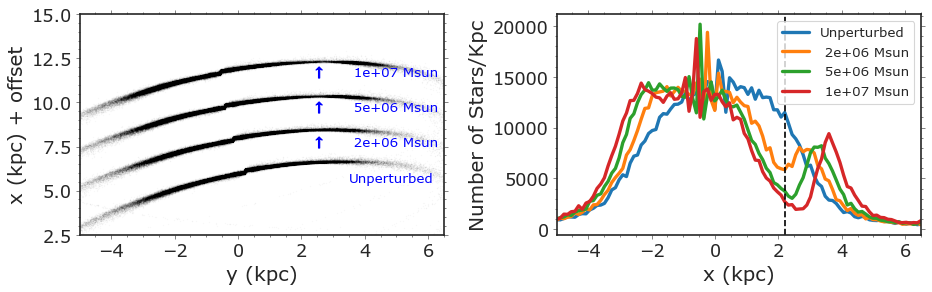

In [73]:
xgrid=np.linspace(-5, 6.5, 100)
vhalo=-50
distance_to_hit=0.5
#compare and contrast

fig, (ax, ax1)=plt.subplots(figsize=(12, 4), ncols=2)

_ =visualize_stream('10_20', [-5, 6.5], [2.5, 15], xgrid, -50, ax, ax1, offset=2)

ax.text(3.5, 11.5, " {:.0e} Msun".format(1e7) ,c='b', fontsize=12)
ax.text(3.5, 9.5, " {:.0e} Msun".format(5e6) ,c='b', fontsize=12)
ax.text(3.5, 7.5, " {:.0e} Msun".format(2e6) ,c='b', fontsize=12)
ax.text(3.5, 5.5, "Unperturbed".format(5e6) ,c='b', fontsize=12)

ax.scatter(2.5,  11.75, color='b', marker='$\u2191$', s=100)
ax.scatter(2.5,  9.75, color='b', marker='$\u2191$', s=100)
ax.scatter(2.5,  7.75, color='b', marker='$\u2191$', s=100)

ax1.legend(fontsize=12)
ax1.axvline(2.2, linestyle='--', c='k')
ax1.minorticks_on()
plt.tight_layout()

plt.savefig(path_plot+'/streams{}.jpeg'.format('10_20'), bbox_inches='tight')

In [51]:

distance_to_hit=0.7
xgrid=np.linspace(-11, 15, 100)
_= visualize_stream('30_40', [-11, 15], [2.5, 15], xgrid, -50, offset=1.5)

TypeError: visualize_stream() missing 2 required positional arguments: 'ax' and 'ax1'

no_self_grav_pal5_rgc50_60_mhalo2.00e+06_vhalo-50_distance_to_hit0.8


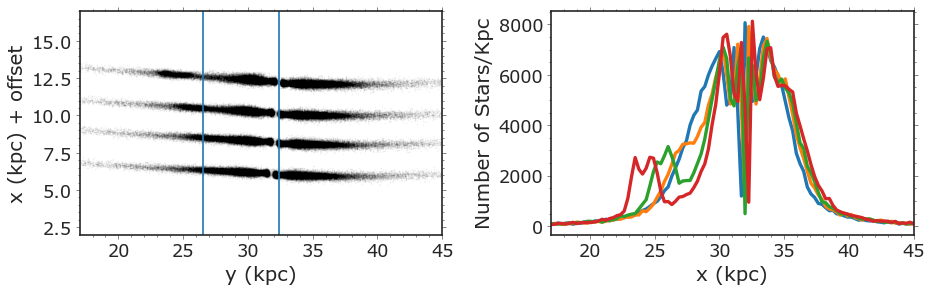

In [8]:
xgrid=np.linspace(17, 45, 100)
distance_to_hit=0.8
x0, y0, ax, ax1= visualize_stream('50_60', [17, 45], [2., 17], xgrid, -50, offset=2)
ax.axvline(26.5)
ax.axvline(np.nanmedian(x0))

In [9]:
35-26.5

8.5

In [10]:
dist_arr=['10_20', '30_40', '50_60']*2
mag_limits=np.concatenate([[27.15]*3, [28.69]*3])
d_galaxy=770*u.kpc
kpc_conversion = np.pi * d_galaxy / 180.
roman_fov= 0.52*u.degree*(kpc_conversion /u.degree)
scaled_arcmin=  10*u.arcmin.to(u.degree)*(kpc_conversion /u.degree).value
mhalo=5e6

from matplotlib import patches

'../figures//gaps_at_M31_mhalo5.00e+06.jpeg'

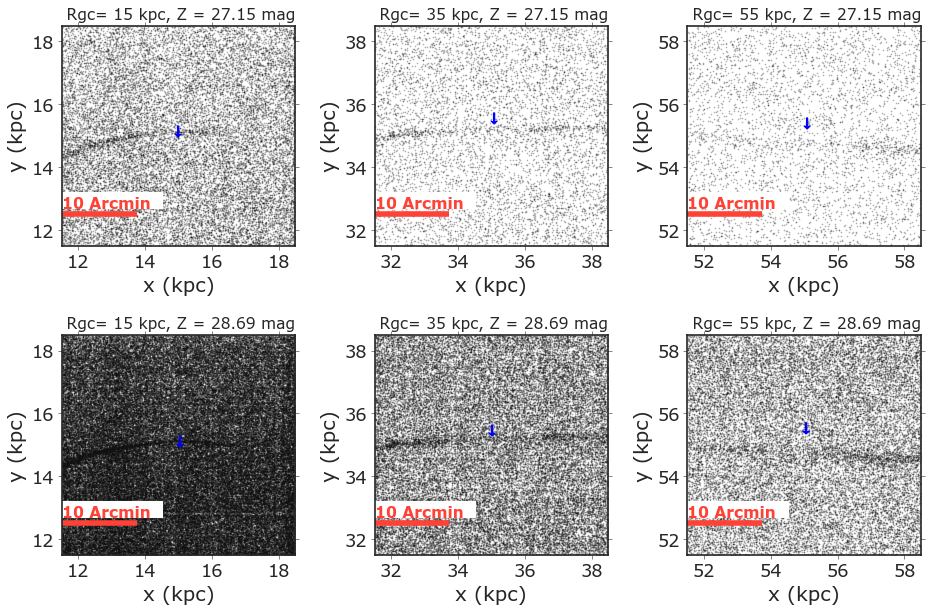

In [80]:
fig, ax=plt.subplots(figsize=(12, 4*2), ncols=3, nrows=2)

for  idx in range(0, 6):
    
    a= np.concatenate(ax)[idx]
    dist= dist_arr[idx]
    mag_limit=mag_limits[idx]
    #get backgrounds
    
    rgc=np.nanmedian(np.array(dist.split('_')).astype(float))
    
    center=np.array([0, 0 ])+rgc
    
    fname= glob.glob(path_images+'/images_rgc{}_mhalo{:.2e}_maglimit{}*'.format(dist, mhalo, mag_limit))[0]
    rst=np.load(fname)
    a.scatter(rst[0], rst[1],  s=0.1, alpha=0.5, color='#111111')
    
    a.set(xlabel='x (kpc)', ylabel='y (kpc)')
    a.set_title(' Rgc= {:.0f} kpc, Z = {} mag'.format(rgc, mag_limit), fontsize=14)
    a.set_xlabel('x (kpc)', fontsize=18)
    a.set_ylabel('y (kpc)', fontsize=18)
    
    #a.axis('equal')
    #a.axis('equal')
    
   
    a.hlines(y=np.nanmin(rst[0])+1, xmin= np.nanmin( rst[0]), xmax=np.nanmin( rst[0])+scaled_arcmin, \
             linewidth=5, color='#FF4136')
    
    rect = patches.Rectangle( (np.nanmin( rst[0]), np.nanmin(rst[0])+1.2), \
                               3, 0.5, linewidth=1, edgecolor='#FFFFFF', facecolor='#FFFFFF')

    # Add the patch to the Axes
    a.add_patch(rect)
    a.text(np.nanmin( rst[0]), np.nanmin(rst[0])+1.2, '10 Arcmin',\
           color='#FF4136', alpha=1, fontsize=14, weight='bold')
    
    a.set(xlim=[rst[0].min(), rst[0].max()],
         ylim=[rst[0].min(), rst[0].max()])
    
    a.scatter(np.nanmedian(rst[0]),  np.nanmedian(rst[1])+0.5, color='b', marker='$\u2193$', s=100)
    



plt.tight_layout()


plt.savefig(path_plot+'/gaps_at_M31_mhalo{:.2e}.jpeg'.format(mhalo))

In [12]:
## --> actually, further remove milky way foregrounds by implementing a brightness cut instead of a metallicity cut
## --> add this to the paper

In [ ]:
 nm

In [13]:
from popsims import sample_from_powerlaw
import scipy.interpolate as interp
path_isochrone='../data/isochrones/'
isochrone_path=path_isochrone
mag_keys=['gmag', 'imag', 'F062mag', 'F087mag']
from scipy.interpolate import interp1d, griddata

def count_pal5_stars_old(mag_limit, dmod):
    dmod_pal5=16.85
    cfht_mini = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [2])
    cfht_gmag = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [24])
    cfht_imag = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [25])
    wfirst_mini = np.loadtxt(isochrone_path+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [2])
    wfirst_mags = np.loadtxt(isochrone_path+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [23,24,25,26,27,28,29])

    sample_lowmasses=sample_from_powerlaw(-0.5, xmin=np.min(cfht_mini), xmax=np.max(cfht_mini), nsample=int(1e6)) 
    inter_gmags = interp.interp1d(cfht_mini, cfht_gmag, bounds_error=False,  fill_value=np.nan)
    inter_imags = interp.interp1d(cfht_mini, cfht_imag, bounds_error=False,  fill_value=np.nan)
    inter_Rmags = interp.interp1d(wfirst_mini, wfirst_mags[:,0], bounds_error=False,  fill_value=np.nan)
    inter_Zmags = interp.interp1d(wfirst_mini, wfirst_mags[:,1], bounds_error=False,  fill_value=np.nan)
    inter_Ymags = interp.interp1d(wfirst_mini, wfirst_mags[:,2], bounds_error=False,  fill_value=np.nan)
    inter_Jmags = interp.interp1d(wfirst_mini, wfirst_mags[:,3], bounds_error=False,  fill_value=np.nan)
    inter_Hmags = interp.interp1d(wfirst_mini, wfirst_mags[:,4], bounds_error=False,  fill_value=np.nan)
    inter_Fmags = interp.interp1d(wfirst_mini, wfirst_mags[:,5], bounds_error=False,  fill_value=np.nan)
    inter_Wmags = interp.interp1d(wfirst_mini, wfirst_mags[:,6], bounds_error=False,  fill_value=np.nan)

    if np.sum(sample_lowmasses < np.min(cfht_mini)) > 0 or np.sum(sample_lowmasses > np.max(cfht_mini)) > 0:
        print("outside of interpolation range based on the CFHT-parsec SSP file. Need to resolve this.")
    else:    
        #CFHT magnitudes
        sample_gmags = inter_gmags(sample_lowmasses) +  dmod_pal5  #distance modulus Pal5
        sample_imags = inter_imags(sample_lowmasses) +  dmod_pal5 #distance modulus Pal5
        #WFIRST magnitudes
        sample_Rmags = inter_Rmags(sample_lowmasses) +  dmod_pal5  #distance modulus Pal5
        sample_Zmags = inter_Zmags(sample_lowmasses)+  dmod_pal5 #distance modulus Pal5
        sample_Ymags = inter_Ymags(sample_lowmasses)  +  dmod_pal5 
        sample_Jmags = inter_Jmags(sample_lowmasses)+  dmod_pal5  #distance modulus Pal5
        sample_Hmags = inter_Hmags(sample_lowmasses) +  dmod_pal5 #distance modulus Pal5
        sample_Fmags = inter_Fmags(sample_lowmasses)+  dmod_pal5 #distance modulus Pal5
        sample_Wmags = inter_Wmags(sample_lowmasses) +  dmod_pal5 #distance modulus Pal5
        
        #renormalize the luminosity function by computing a normalization factor
        num_20_23= len(sample_gmags[np.logical_and(sample_gmags>=20, sample_gmags<=23)])
        #print ('number of stars between 20 and 23 G mag {}'.format( num_20_23))

        norm= 3000/num_20_23
        #print (norm)
        
        #compute the difference between distance moduli and offset stars
        dist_mod_And = dmod-dmod_pal5
        #offset_Zmags= sample_Zmags+  dist_mod_And
        nstars_wfirst = (len(np.where((sample_Zmags < (mag_limit-dist_mod_And)  ))[0]))*norm
        
        #fig, ax=plt.subplots()
        #plt.scatter( sample_lowmasses, sample_gmags)
        #ax.set(ylabel=k, xlabel='Mass ')
        #j
        return nstars_wfirst
    
def count_pal5_stars(mag_limit, dmod, iso_version=3.6):
    
    dmod_pal5=16.85
    def read_pandas_isochrones():
        from astropy.io import ascii
        return ascii.read(path_isochrone+'/cfht_pre2014_isochrones_pal5_{}.txt'.format(iso_version)).to_pandas()
    def read_roman_isochrones():
        from astropy.io import ascii
        return ascii.read(path_isochrone+'/roman_isochrones_vega_pal5_{}.txt'.format(iso_version)).to_pandas()
    
    cfht=read_pandas_isochrones()
    roman= read_roman_isochrones()

    isos=pd.Series({})
    for k in mag_keys:
        
        masses=None
        if k in roman.columns:
            x=roman.Mini.values
            y=roman[k].values
            nsample=1e6
            masses= sample_from_powerlaw(-0.5, xmin=np.nanmin(roman.Mini.values), \
                                         xmax=0.83, \
                                         nsample=nsample)
            
            nans=np.logical_or(np.isnan(x), np.isnan(y))
            isos['mass']= masses
            #f=griddata(x[~nans], y[~nans], np.log10(masses) , fill_value=np.nan, method='linear', rescale=True)

            v= interp.interp1d(x[~nans], y[~nans], bounds_error=False,  fill_value=np.nan, kind='nearest-up')(masses)

            isos[k]= v+dmod_pal5
            
        if k in cfht.columns:
            x= cfht.Mini.values
            y=cfht[k].values
            nsample=1e6
            masses= sample_from_powerlaw(-0.5, xmin=np.nanmin(cfht.Mini.values), \
                                         xmax=0.83, \
                                         nsample=nsample)
            
            nans=np.logical_or(np.isnan(x), np.isnan(y))
            isos['mass']= masses
            #f=griddata(x[~nans], y[~nans], np.log10(masses) , fill_value=np.nan, method='linear', rescale=True)

            v= interp.interp1d(x[~nans], y[~nans], bounds_error=False,  fill_value=np.nan, kind='linear')(masses)
            isos[k]= v+dmod_pal5
            
            #fig, ax=plt.subplots()
            #plt.scatter(masses, isos[k])
            #ax.set(ylabel=k, xlabel='Mass ')
            #j
    
    df=pd.DataFrame(dict(isos))
    #print (df)
    
    num_20_23= len(df.gmag.values[np.logical_and(df.gmag.values>=20, df.gmag.values<=23)])
    norm= (3000/num_20_23)
    #print (norm)
    
    #compute the difference between distance moduli and offset stars
    dist_mod_And = dmod-dmod_pal5

    #return len(df.F087mag.values[df.F087mag.values<(mag_limit-dist_mod_And)])*norm
    return [(len(np.where((df.F087mag.values < (mag_limit-dist_mod_And)  ))[0]))*norm, df.F062mag.values, df.F087mag.values, df.gmag.values, df.imag.values]


In [14]:
d=np.linspace(500, 5000, 100)*u.kpc
dmods=5*np.log10(d.to(u.pc)/(10*u.pc)).value

In [15]:
from tqdm import tqdm

In [16]:
old_res=[count_pal5_stars_old(28.54, x)[0] for x in dmods]
new_res=[count_pal5_stars(28.54, x)[0] for x in dmods]
new_res_37=[count_pal5_stars(28.54, x, iso_version=3.7)[0] for x in dmods]



TypeError: 'float' object is not subscriptable

In [ ]:
new_res=np.array( new_res)
new_res_37= np.array(new_res_37)
old_res= np.array( old_res)

In [ ]:
fig, ax=plt.subplots()
ax.plot(dmods, new_res, label='Isochrones Version 3.6', color='#0074D9')
ax.fill_between(dmods, new_res-new_res**0.5, new_res+new_res**0.5, alpha=0.2, color='#0074D9')

ax.plot(dmods, new_res_37, label='Isochrones Version 3.7', color='#001f3f')
ax.fill_between(dmods, new_res_37-new_res_37**0.5, new_res_37+new_res_37**0.5, alpha=0.2, color='#001f3f')

ax.plot(dmods, old_res, label='Old Isochrones', color='#FF851B')
ax.fill_between(dmods, old_res-old_res**0.5, old_res+old_res**0.5, alpha=0.2, color='#FF851B')

ax.scatter(24.43, 1299, marker='D', s=300, label='Pearson2019', c='k')
ax.legend()
ax.minorticks_on()
ax.set(xlabel='Distance Modulus', ylabel='NStars in Pal5 at Z=28.54')
plt.savefig('../figures/pal5_predictions.jpeg')

In [ ]:
from astropy.io import ascii
df=ascii.read(path_isochrone+'/roman_isochrones_vega_pal5_{}.txt'.format(3.6)).to_pandas()
df1=ascii.read(path_isochrone+'/roman_isochrones_vega_pal5_{}.txt'.format(3.7)).to_pandas()
df2=ascii.read(path_isochrone+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt').to_pandas()

fig, ax=plt.subplots()


ax.scatter(df['F062mag']-df['F087mag'], df['F087mag']+16.85, s=5, 
           label='New, Version 3.6',  color='#0074D9')
ax.scatter(df1['F062mag']-df1['F087mag'], df1['F087mag']+16.85, s=5, 
           label='New, Version 3.7', color='#001f3f')

ax.scatter(df2['R062mag']-df2['Z087mag'], df2['Z087mag']+16.85, s=5, \
           label='old', color='#FF851B')
#ax.grid()
ax.set(ylim=np.array([10, -5])+16.85, xlim=[0, 1.6], xlabel='R-Z', ylabel='Z')
plt.legend()
plt.savefig('../e')

In [ ]:
new_res_interp=[count_pal5_stars(28.54, x)[1:] for x in dmods]
new_res_37_interp=[count_pal5_stars(28.54, x, iso_version=3.7)[1:] for x in dmods]
old_res_interp=[count_pal5_stars_old(28.54, x)[1:] for x in dmods]


In [ ]:
fig, ax=plt.subplots()

ax.scatter(new_res_interp[0][0]-new_res_interp[0][1], new_res_interp[0][1], s=.1)
ax.scatter(new_res_37_interp[0][0]-new_res_37_interp[0][1], new_res_37_interp[0][1], s=.1)
ax.scatter(old_res_interp[0][0]-old_res_interp[0][1], old_res_interp[0][1], s=.1, c='k')

ax.invert_yaxis()

In [ ]:
fig, ax=plt.subplots()
ax.scatter(df1.Mini,df1['F087mag'], label='Z mag', s=20)
#ax.scatter(df1.Mini,df1['F062mag'], label='R mag',s=20)

ax.scatter(df.Mini,df1['F087mag'], label='Z mag', s=20)
#ax.scatter(df.Mini,df1['F062mag'], label='R mag',s=20)
ax.set(xlabel='Mini', ylabel='mag')
plt.legend()
plt.savefig('../figures/interpolations.jpeg')

In [ ]:
vls=count_pal5_stars_old(28.54, 24.43)

In [ ]:
fig, ax=plt.subplots()
ax.scatter(vls[1]-vls[2], vls[2], s=.1)
ax.invert_yaxis()

In [ ]:
df=ascii.read(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt').to_pandas()

In [ ]:
df.Mini.max()